:**<font size=6>Practice. Module4</font>**

<font color=green><h3><b>**Task description**</b><font>

<font color=green><h5><b>About the task:</b><font>

**Predictive Regression Modeling**: forecast property prices based on various features like location, size, and etc.

You’re provided with a dataset containing data about properties for sale in a certain city (you’ve seen the data before in examples in other modules). The dataset is divided into the training and test subsets (with no target values for the objects — you need to predict those). Your target variable is the property price 'price', a numerical feature. You need to predict it in the test dataset.






<font color=green><h3><b>**О данных**</b><font>

<font color=green><h5><b> Dataset Overview</b><font>

This dataset comprises detailed real estate listings. It includes 2,000 entries with information on property characteristics such as type, size, **price** (target), and other features.

The dataset contains no real-world data.

<font color=green><h5><b>Column Descriptors</b><font>

1. type: type of property (single-family home, condo, etc.)

2. year_built: year in which the property was constructed

3. beds: number of bedrooms

4. baths: total number of bathrooms (including full and half)

5. garage: garage capacity (number of cars)

6. services: tenant satisfaction survey (from 1 to 5)

7. lot_sqft: size of the lot in square feet.

8. sqft: living area size in square feet.

9. floors: number of floors.

10. sold_price: price at which the property was last sold.

11. sold_date: date on which the property was last sold.

12. price: listing price of the property (target).

13. transport: availability of public transport.


<font color=green><h3><b>About the solution and the baseline
</b><font>

You can solve the task using the pipeline we’ve studied in the course. You need to apply the preprocessing and target prediction methods from the regression task module. To help you approach the task, we’ll describe the baseline prediction on slightly preprocessed data using linear regression, and also highlight the problems in the dataset and the starting points for your experiments.
The starter ideas for improving the baseline solution are provided below — we suggest that you explore them first. Pay special attention to data handling and preprocessing, as well as exploratory data analysis (EDA). We also suggest that you look into other linear and non-linear regression prediction algorithms.


<font color=green><h3><b>**How we evaluate your solution**</b><font>

To evaluate your solution, we’ll use the MSE metric on the test sample (test_sample.csv). The column with the true target variable has been deleted in the file. Your task is to predict the target variable value for each object, fill in the submission file, and send it to the LMS for evaluation. Make sure that the order of objects in the submission file is the same as in the test dataset `test_sample.csv` — otherwise, we won’t be able to evaluate your solution. See below for instructions on how to prepare the submission file.
Your need to fill in the `submission.csv` file with predicted values of the target regression variable for each object in the test dataset (that is, the expected price of each property). The LMS will calculate the prediction error and evaluate your solution against a certain error threshold. If your prediction pipeline is effective, you'll be awarded a full score for the task.


<font color=green><h3><b>**Preparing the submission file**</b><font>

Use the code from this notebook to prepare your submission file. Make sure that the order of objects in the submission file is the same as in the test dataset, and that there is only one column with responses from your model. You’ll find the preparation code below the baseline solution. Click [here](https://www.kaggle.com/code/sgwood/step-1-understanding-the-submission-file). for more information about the submission file.


<font color=green><h3><b>**More about uploading the file to the LMS**</b><font>


You need to upload the submission.csv file to the checking system within the LMS. To do this, use the file upload (see the screenshot).


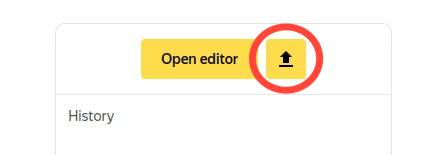

<font color=green><h3><b>**Baseline and your works**</b><font>

In [41]:
# baseline imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# your code here (other imports)
# Additional imports for preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

# Additional models
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# For EDA
import missingno as msno
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go

# For metrics and evaluation
from sklearn.metrics import r2_score, mean_absolute_error

# For ignoring warnings (optional, useful during experimentation)
import warnings
warnings.filterwarnings('ignore')


In [42]:
# import data,  specify path to data
# train_sample = pd.read_csv('root/train_sample.csv')
# test_sample = pd.read_csv('root/test_sample.csv')
train_sample = pd.read_csv('train_sample.csv')
test_sample = pd.read_csv('test_sample.csv')

In [43]:
train_sample

,sold_date,sold_price,year_built,garage,sqft,type,price,transport,services,beds,floors,baths,lot_sqft
0,2005-05-16,46.480370,1966.0,1.0,320.000000,condos,45.503842,False,5,2.0,31.0,1.0,NaN
1,NaN,NaN,2013.0,1.0,NaN,condos,66.400062,False,2,2.0,16.0,2.0,NaN
2,2005-06-17,59.103574,1935.0,2.0,644.000000,single_family,120.926742,True,5,4.0,2.0,3.0,1599.000000
3,NaN,NaN,1922.0,NaN,NaN,condos,48.237728,False,2,2.0,3.0,2.0,NaN
4,2000-03-13,11.283478,1961.0,NaN,266.666667,condos,27.813441,False,5,1.0,8.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,NaN,NaN,1916.0,NaN,NaN,multi_family,69.107512,False,2,6.0,NaN,2.0,1041.666667
1596,2022-08-04,80.853155,1946.0,1.0,433.333333,condos,90.881413,True,5,2.0,10.0,2.0,NaN
1597,2018-08-02,8.920658,1947.0,NaN,400.000000,single_family,26.369894,False,2,3.0,1.0,1.0,NaN
1598,NaN,NaN,2020.0,NaN,178.666667,condos,36.560360,False,2,1.0,4.0,1.0,NaN


<font color=green><h3><b>$\alpha$. Preprocessing and EDA</b><h3>

Note there are many omissions, duplicates, outliers, and non-informative features in the dataset, so you need to improve its quality for model training. Below, we highlight some of the problems in the data that may degrade the model quality.</font>

<font color=green>Use graphs to explore the data in detail and find relationships that you can later incorporate into the model. Let’s plot a couple of graphs that may be useful for further model building.</font>


In [44]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sold_date   1136 non-null   object 
 1   sold_price  1136 non-null   float64
 2   year_built  1433 non-null   float64
 3   garage      1023 non-null   float64
 4   sqft        1150 non-null   float64
 5   type        1600 non-null   object 
 6   price       1594 non-null   float64
 7   transport   1600 non-null   bool   
 8   services    1600 non-null   int64  
 9   beds        1550 non-null   float64
 10  floors      1303 non-null   float64
 11  baths       1599 non-null   float64
 12  lot_sqft    792 non-null    float64
dtypes: bool(1), float64(9), int64(1), object(2)
memory usage: 151.7+ KB


There are many omissions in the dataset. A naive solution is to fill in the omissions with zeros. Don’t forget to preprocess the test dataset.



In [45]:
train_sample = train_sample.fillna(value=0)
test_sample = test_sample.fillna(value=0)

In [46]:
train_sample

,sold_date,sold_price,year_built,garage,sqft,type,price,transport,services,beds,floors,baths,lot_sqft
0,2005-05-16,46.480370,1966.0,1.0,320.000000,condos,45.503842,False,5,2.0,31.0,1.0,0.000000
1,0,0.000000,2013.0,1.0,0.000000,condos,66.400062,False,2,2.0,16.0,2.0,0.000000
2,2005-06-17,59.103574,1935.0,2.0,644.000000,single_family,120.926742,True,5,4.0,2.0,3.0,1599.000000
3,0,0.000000,1922.0,0.0,0.000000,condos,48.237728,False,2,2.0,3.0,2.0,0.000000
4,2000-03-13,11.283478,1961.0,0.0,266.666667,condos,27.813441,False,5,1.0,8.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0.000000,1916.0,0.0,0.000000,multi_family,69.107512,False,2,6.0,0.0,2.0,1041.666667
1596,2022-08-04,80.853155,1946.0,1.0,433.333333,condos,90.881413,True,5,2.0,10.0,2.0,0.000000
1597,2018-08-02,8.920658,1947.0,0.0,400.000000,single_family,26.369894,False,2,3.0,1.0,1.0,0.000000
1598,0,0.000000,2020.0,0.0,178.666667,condos,36.560360,False,2,1.0,4.0,1.0,0.000000


In [47]:
test_sample

,sold_date,sold_price,year_built,garage,sqft,type,transport,services,beds,floors,baths,lot_sqft
0,2021-10-14,26.360161,1923.0,2.0,954.000000,single_family,False,5,4.0,2.0,4.0,1219.666667
1,1991-07-09,19.665204,1953.0,2.0,0.000000,single_family,False,5,3.0,2.0,3.0,1041.666667
2,0,0.000000,1935.0,2.0,483.333333,single_family,False,5,3.0,2.0,3.0,1354.666667
3,0,0.000000,2004.0,2.0,2133.333333,single_family,False,2,6.0,3.0,6.0,1500.000000
4,1994-10-19,27.737955,1913.0,2.0,0.000000,single_family,False,5,4.0,2.0,3.0,1250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1988-08-31,98.185034,1909.0,2.0,899.333333,single_family,True,5,3.0,3.0,4.0,513.666667
396,1995-04-27,62.719926,1987.0,2.0,1100.000000,single_family,True,5,4.0,3.0,4.0,875.000000
397,0,0.000000,1922.0,2.0,0.000000,multi_family,False,5,7.0,0.0,4.0,1306.666667
398,0,0.000000,2020.0,1.0,1185.666667,condos,False,3,3.0,15.0,4.0,0.000000


Note that the dependence between the target variable and some other columns may be non-linear (heteroscedastic, for example).

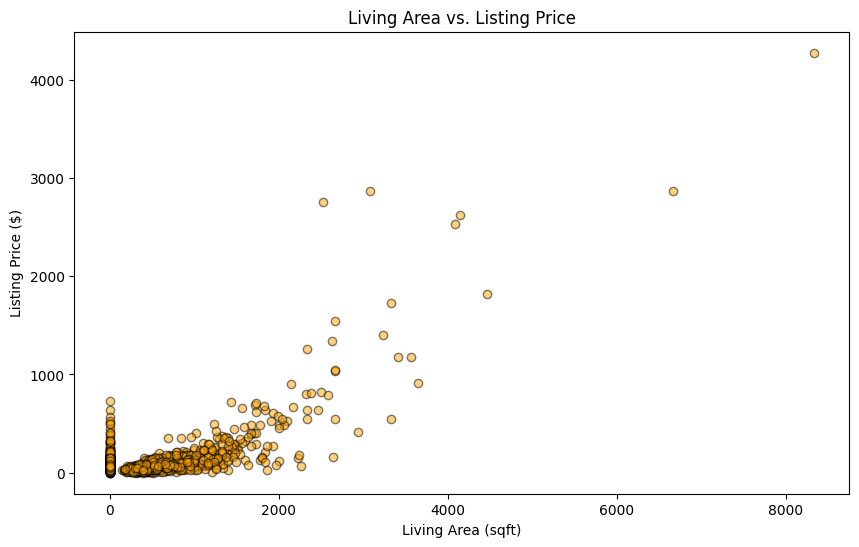

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(train_sample['sqft'], train_sample['price'], color='orange', alpha=0.5, edgecolors='black')
plt.title('Living Area vs. Listing Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Listing Price ($)')
plt.show()

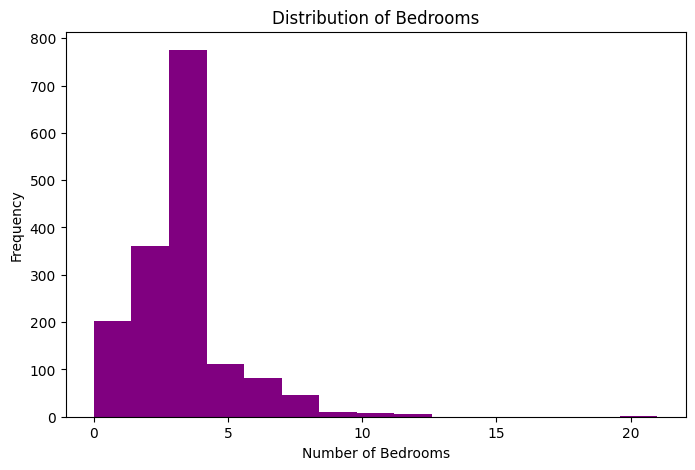

In [49]:
plt.figure(figsize=(8, 5))
plt.hist(train_sample['beds'], bins=15, color='purple')
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

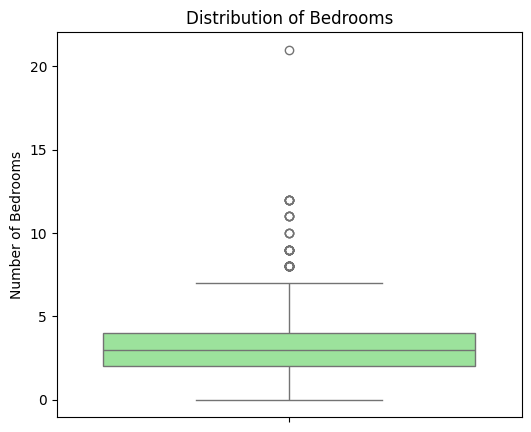

In [50]:
plt.figure(figsize=(6, 5))
sns.boxplot(train_sample['beds'], color='lightgreen')
plt.title('Distribution of Bedrooms')
plt.ylabel('Number of Bedrooms')
plt.show()

This method of representing data distribution is called box plot (or whisker plot). The graph shows the main variation statistics (median, quartiles, and interquartile range). To improve your model’s performance, preprocess the outliers in the number of beds distribution. Filtering out most outliers.


In [51]:
train_sample = train_sample[train_sample['beds'] < 10]
train_sample

,sold_date,sold_price,year_built,garage,sqft,type,price,transport,services,beds,floors,baths,lot_sqft
0,2005-05-16,46.480370,1966.0,1.0,320.000000,condos,45.503842,False,5,2.0,31.0,1.0,0.000000
1,0,0.000000,2013.0,1.0,0.000000,condos,66.400062,False,2,2.0,16.0,2.0,0.000000
2,2005-06-17,59.103574,1935.0,2.0,644.000000,single_family,120.926742,True,5,4.0,2.0,3.0,1599.000000
3,0,0.000000,1922.0,0.0,0.000000,condos,48.237728,False,2,2.0,3.0,2.0,0.000000
4,2000-03-13,11.283478,1961.0,0.0,266.666667,condos,27.813441,False,5,1.0,8.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0.000000,1916.0,0.0,0.000000,multi_family,69.107512,False,2,6.0,0.0,2.0,1041.666667
1596,2022-08-04,80.853155,1946.0,1.0,433.333333,condos,90.881413,True,5,2.0,10.0,2.0,0.000000
1597,2018-08-02,8.920658,1947.0,0.0,400.000000,single_family,26.369894,False,2,3.0,1.0,1.0,0.000000
1598,0,0.000000,2020.0,0.0,178.666667,condos,36.560360,False,2,1.0,4.0,1.0,0.000000


In [52]:
# your code here

<font color=green><h3><b>$\beta$. Encoding and Scaling</b><h3>

</font>

In [53]:
# put the target of the training dataset into a separate variable and remove it from the training set
y_train = train_sample['price']
X_train = train_sample.drop(columns='price')
X_test = test_sample

In [54]:
# create a mask of categorical features
cat_features_mask = (X_train.dtypes == "object").values
cat_features_mask

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False])

In [55]:
# use tilda operator to invert the mask for numerical features
~cat_features_mask

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [56]:
X_train.shape

(1586, 12)

Categorical features encoding: convert categorical features into numerical form (using OneHotEncoding). We need to convert two datasets at once because the number of unique values of features in different parts of the data may vary

In [57]:
all_cat_features = pd.concat([X_train.loc[:, cat_features_mask], X_test.loc[:, cat_features_mask]], axis=0)
all_cat_features_ohe = pd.get_dummies(all_cat_features)
all_cat_features_ohe

,sold_date_0,sold_date_1976-11-09,sold_date_1976-12-08,sold_date_1977-03-23,sold_date_1977-04-11,sold_date_1977-04-19,sold_date_1977-04-27,sold_date_1978-05-22,sold_date_1978-08-31,sold_date_1978-09-07,...,sold_date_2023-12-28,sold_date_2024-01-18,sold_date_2024-02-16,type_apartment,type_condos,type_land,type_mobile,type_multi_family,type_single_family,type_townhomes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
397,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
398,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [58]:
X_train_cat, X_test_cat = all_cat_features_ohe[:X_train.__len__()], all_cat_features_ohe[X_train.__len__():]
X_train_cat

,sold_date_0,sold_date_1976-11-09,sold_date_1976-12-08,sold_date_1977-03-23,sold_date_1977-04-11,sold_date_1977-04-19,sold_date_1977-04-27,sold_date_1978-05-22,sold_date_1978-08-31,sold_date_1978-09-07,...,sold_date_2023-12-28,sold_date_2024-01-18,sold_date_2024-02-16,type_apartment,type_condos,type_land,type_mobile,type_multi_family,type_single_family,type_townhomes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1598,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [59]:
X_test_cat

,sold_date_0,sold_date_1976-11-09,sold_date_1976-12-08,sold_date_1977-03-23,sold_date_1977-04-11,sold_date_1977-04-19,sold_date_1977-04-27,sold_date_1978-05-22,sold_date_1978-08-31,sold_date_1978-09-07,...,sold_date_2023-12-28,sold_date_2024-01-18,sold_date_2024-02-16,type_apartment,type_condos,type_land,type_mobile,type_multi_family,type_single_family,type_townhomes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
397,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
398,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [60]:
# numerical feautures scaling
X_train_num = X_train.loc[:, ~cat_features_mask]
X_test_num = X_test.loc[:, ~cat_features_mask]

# fitting scaler and transforming data
scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [61]:
# concatenate by columns, axis=1
X_train = np.concatenate([X_train_num, X_train_cat], axis=1)
X_test = np.concatenate([X_test_num, X_test_cat], axis=1)

In [62]:
# let’s look at the dataset
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259
0,0.037049,0.972786,0.0025,0.03840,0.0,1.00,0.222222,0.260504,0.076923,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.996042,0.0025,0.00000,0.0,0.25,0.222222,0.134454,0.153846,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.047111,0.957447,0.0050,0.07728,1.0,1.00,0.444444,0.016807,0.230769,0.002225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.951014,0.0000,0.00000,0.0,0.25,0.222222,0.025210,0.153846,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.008994,0.970312,0.0000,0.03200,0.0,1.00,0.111111,0.067227,0.076923,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,0.000000,0.948046,0.0000,0.00000,0.0,0.25,0.666667,0.000000,0.153846,0.001449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1582,0.064447,0.962890,0.0025,0.05200,1.0,1.00,0.222222,0.084034,0.153846,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1583,0.007111,0.963384,0.0000,0.04800,0.0,0.25,0.333333,0.008403,0.076923,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1584,0.000000,0.999505,0.0000,0.02144,0.0,0.25,0.111111,0.033613,0.076923,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [63]:
y_train

,price
0,45.503842
1,66.400062
2,120.926742
3,48.237728
4,27.813441
...,...
1595,69.107512
1596,90.881413
1597,26.369894
1598,36.560360


In [64]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259
0,0.021011,0.951509,0.0050,0.11448,0.0,1.00,0.444444,0.016807,0.307692,0.001697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.015675,0.966353,0.0050,0.00000,0.0,1.00,0.333333,0.016807,0.230769,0.001449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.957447,0.0050,0.05800,0.0,1.00,0.333333,0.016807,0.230769,0.001885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.991588,0.0050,0.25600,0.0,0.25,0.666667,0.025210,0.461538,0.002087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.022110,0.946561,0.0050,0.00000,0.0,1.00,0.444444,0.016807,0.230769,0.001739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.078262,0.944582,0.0050,0.10792,1.0,1.00,0.333333,0.025210,0.307692,0.000715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
396,0.049994,0.983177,0.0050,0.13200,1.0,1.00,0.444444,0.025210,0.307692,0.001218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
397,0.000000,0.951014,0.0050,0.00000,0.0,1.00,0.777778,0.000000,0.307692,0.001818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
398,0.000000,0.999505,0.0025,0.14228,0.0,0.50,0.333333,0.126050,0.307692,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# your code here
# Definisikan semua model yang ingin dicoba
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3),
    "DecisionTree": DecisionTreeRegressor(max_depth=5),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=5),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
}

# Loop untuk fit semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    mse_train = mse(y_train, y_pred)
    print(f"{name:20s} → Train MSE: {mse_train:.4f}")

LinearRegression     → Train MSE: 10201.3334
Ridge                → Train MSE: 13605.4054
Lasso                → Train MSE: 15082.4834
SGDRegressor         → Train MSE: 15980.6951
DecisionTree         → Train MSE: 3194.7804
RandomForest         → Train MSE: 3791.8047
GradientBoosting     → Train MSE: 1846.8091
MLPRegressor         → Train MSE: 19130.0553


<font color=green><H3><b>$\gamma$. Model: fitting weights </b></H2>
</font>

<font color=green> Now let’s train a linear regression model on the data and look at the model weights.
</font>

In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)
from sklearn.ensemble import GradientBoostingRegressor

lr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [82]:
lr.coef_

AttributeError: 'GradientBoostingRegressor' object has no attribute 'coef_'

In [83]:
lr.intercept_

AttributeError: 'GradientBoostingRegressor' object has no attribute 'intercept_'

In [69]:
# your code here

<font color=green><H3><b>$\delta$. Model: evaluation and submit</b></H2>
</font>

<font color=green> Evaluate the model using a selected metric (for example, MSE). Fill in the submission.csv file with the prediction data generated by the model and submit it to the LMS.</font>

In [84]:
y_train_hat = lr.predict(X_train)
mse_lr = mse(y_train_hat, y_train)

# also: RMSE will estimate the error on the dataset in the original units

In [85]:
(y_train_hat - y_train).abs().sum() / 1600

np.float64(26.42391168195213)

In [86]:
np.sqrt(mse_lr)

np.float64(42.974516429850155)

In [73]:
# your code here

In [89]:
# submission
y_hat_test = lr.predict(X_test)
pd.DataFrame(y_hat_test).to_csv('submission.csv') # save csv-file to root/submission.csv

In [88]:
# also: example of preparing zeros submission
y_hat_test = np.zeros(y_hat_test.shape)
pd.DataFrame(y_hat_test).to_csv('submission.csv')

<font color=green>Send the submission file to the LMS.<font color=green>

<font color=green><h3><b>$\epsilon$. 💡**Starter Ideas**</b></h3></font>



1. **Preproccesing**: thoroughly preprocess the data, removing duplicates and filling in the omissions with more complex rules (for example, use the mode for each feature).
2. **EDA**: explore the distribution of the object features, remove outliers, and carefully examine the target variable. Exploratory data analysis may yield more important insights than any machine learning model, because your findings have will have one invaluable quality — interpretability. You may want take a closer look at the discrete distributions of categorical features, as well as the number of unique feature values and how informative the variable is. Examine shifts in variable values, including in different datasets (training and test).
3. **Tuning model, validation set**: for the final stage, a model is usually evaluated on a validation set rather than on a training dataset. A part of the training dataset is put aside for the validation set, and the model is trained on the remaining data. Validation sets are also useful for tuning hyperparameters (for example, using cross-validation) for optimal model performance.
4. **Other linear (and non-linear) models**: try out different approaches to linear models (Ridge, Lasso, SGDRegressor, MLPRegressor).
5. **Robust algorithms**: Try using more robust (noise-tolerant) prediction algorithms. For example, you may try to thoroughly analyze the data and describe the target variable with decision algorithms (match-case statement, if-else, decision trees).
